<h1 style='Color:Red'> Credit Card Fraud Detection- Version3 with RandomForest & GradientBoost

In [188]:
import pandas as pd

In [81]:
data=pd.read_csv("/Users/pallab1200/Downloads/creditcard.csv")

<h1> Simple Data Understanding & Data Manipulation As Per Need

In [82]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [83]:
data.shape

(284807, 31)

In [84]:
data.Class.unique()

array([0, 1])

In [85]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [86]:
#so data is imbalanced. We have to balance our data

In [87]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [88]:
data.duplicated().sum()

1081

In [89]:
data=data.drop_duplicates()

In [90]:
data.duplicated().sum()

0

In [91]:
data.shape

(283726, 31)

<h1> Data Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc=StandardScaler()

In [94]:
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [95]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0


<h1> Feature Engg & feature Selection

In [96]:
from sklearn.ensemble import ExtraTreesClassifier

In [97]:
etc=ExtraTreesClassifier()

In [98]:
X=data.drop(columns='Class')

In [99]:
X.shape

(283726, 30)

In [100]:
Y=data['Class']

In [101]:
Y.shape

(283726,)

In [102]:
etc.fit(X,Y)

ExtraTreesClassifier()

In [103]:
column=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [104]:
imp_parameters=pd.Series(etc.feature_importances_,index=column)

In [105]:
imp_parameters.head()

Time    0.016343
V1      0.013419
V2      0.016228
V3      0.034760
V4      0.041336
dtype: float64

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

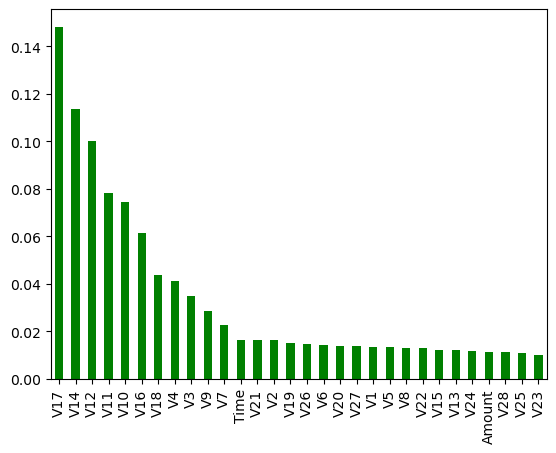

In [107]:
imp_parameters.nlargest(31).plot(kind='bar',color='g')

In [108]:
#SO V14 to V18 in this chart is most important feature rather than all.

In [109]:
tc=imp_parameters.Time

In [110]:
tp=imp_parameters.nlargest(10).mean()


In [111]:
if(tc>tp):
    print("YES")
else:
    print("NO")

NO


In [112]:
# So Time is non desirable as its score < tp.large10.mean()

In [113]:
#So Drop Time Feature

In [114]:
X.drop(columns='Time',inplace=True)

In [115]:
X.head(1).shape

(1, 29)

<h1> Handling Imbalanced

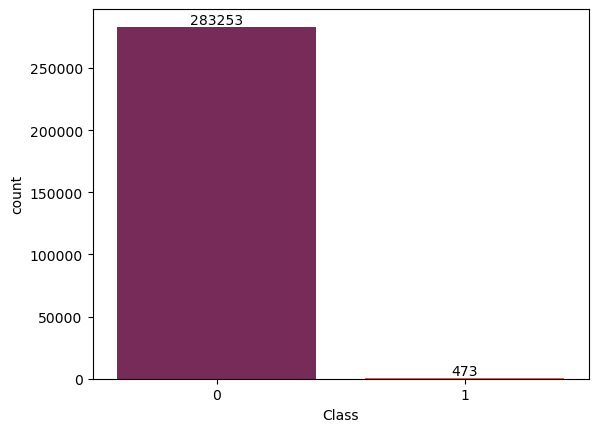

In [116]:
var=sns.countplot(x=Y,palette='rocket')

for i in var.containers:
    var.bar_label(i)
plt.show()

There is twpo ways to Handling Imbalanced. One is Undersampling and another is oversampling. But in undersampli bg there will be chance of data missing from the system rather than the loss of sensitive information . for that reasin i have to choose the oversampling for this case.

### oversampling using SMOTE

In [117]:
!pip install imblearn

In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
U,T=SMOTE().fit_resample(X,Y)

In [120]:
lst=[X,Y]
for i in lst:
    print(i.shape)
  

(283726, 29)
(283726,)


In [121]:
U.shape

(566506, 29)

In [122]:
T.shape

(566506,)

In [123]:
Y.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [124]:
T.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [125]:
# SO the 0 & 1 Count of Y is now fixed.

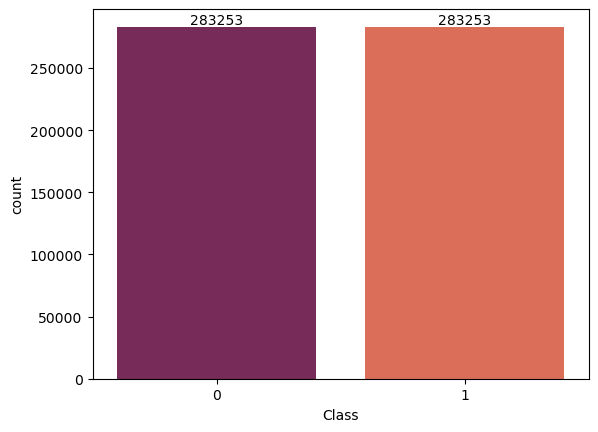

In [126]:
var=sns.countplot(x=T,palette='rocket')

for i in var.containers:
    var.bar_label(i)
plt.show()

<h1> MODEL CHOOSING

<h3 style="color:blue">In this version i am adding XGBoost & RF as this was the previous highest score .

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [128]:
mdl1=RandomForestClassifier()
mdl2=GradientBoostingClassifier()

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,Y_train,Y_test=train_test_split(U,T,test_size=0.35,random_state=42)

In [131]:
len(X_train)

368228

In [132]:
len(X_test)

198278

In [133]:
mdl1.fit(X_train,Y_train)
mdl2.fit(X_train,Y_train)

GradientBoostingClassifier()

In [135]:
mdl1.score(X_test,Y_test)

0.9998285235880935

In [136]:
mdl2.score(X_test,Y_test)

0.976704425100112

In [139]:
y_predicted=mdl1.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [142]:
lyt=[accuracy_score,f1_score,precision_score,recall_score]
for i in lyt:
    print(i(y_predicted,Y_test))

0.9998285235880935
0.9998285841047049
1.0
0.9996572269661562


In [143]:
lyt_RF=[0.9998285235880935,
0.9998285841047049,
1.0,
0.9996572269661562]

In [146]:
y_predicted2=mdl2.predict(X_test)

In [147]:
lyt=[accuracy_score,f1_score,precision_score,recall_score]
for i in lyt:
    print(i(y_predicted2,Y_test))

0.976704425100112
0.976515509728853
0.9684843228415543
0.9846810081414187


In [148]:
lyt_GBC=[0.976704425100112,
0.976515509728853,
0.9684843228415543,
0.9846810081414187]

In [157]:
da=pd.DataFrame(lyt_RF,index=['Accuracy_score','F1_Score','Precision_Score','Recall_Score'],columns=['RF'])
da

,RF
Accuracy_score,0.999829
F1_Score,0.999829
Precision_Score,1.000000
Recall_Score,0.999657


In [159]:
dq=pd.DataFrame(lyt_GBC,index=['Accuracy_score','F1_Score','Precision_Score','Recall_Score'],columns=['GBC'])
dq

,GBC
Accuracy_score,0.976704
F1_Score,0.976516
Precision_Score,0.968484
Recall_Score,0.984681


In [160]:
import seaborn as sns

In [164]:
da.index

Index(['Accuracy_score', 'F1_Score', 'Precision_Score', 'Recall_Score'], dtype='object')

In [168]:
da.RF

Accuracy_score     0.999829
F1_Score           0.999829
Precision_Score    1.000000
Recall_Score       0.999657
Name: RF, dtype: float64

In [165]:
SCORE=['Accuracy_score', 'F1_Score', 'Precision_Score', 'Recall_Score']

In [173]:
ACCVAL=[da.RF[1],dq.GBC[1]]
ACCVAL

[0.9998285841047049, 0.976515509728853]

In [182]:
dlist=pd.DataFrame(ACCVAL,columns=['ACC'])
dlist

,ACC
0,0.999829
1,0.976516


In [184]:
dlist['Model']=['RF','GBC']
dlist

,ACC,Model
0,0.999829,RF
1,0.976516,GBC


In [181]:
import seaborn as sns

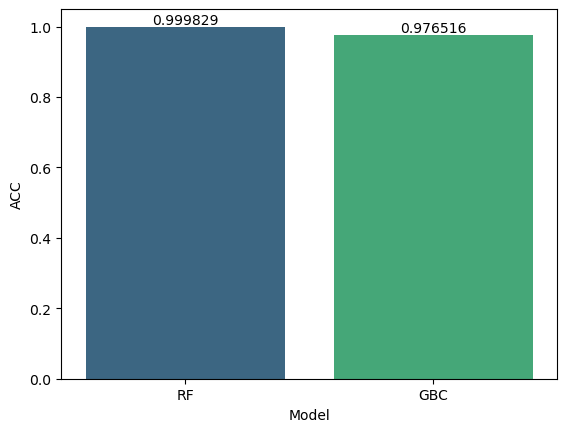

In [187]:
ttg=sns.barplot(x=dlist.Model,y=dlist.ACC,palette='viridis')
for i in ttg.containers:
    ttg.bar_label(i)

# so Random forest pertains best accuracy.